# Portfolio Project: Data Visualization
## Life Expectancy Analysis of Six Different Countries

In this portfolio project, the dataset to be analyzed is provided by Codecademy.com under the title of 'all_data.csv'. By working with the datasets provided, the relationships between each country's economic output and its people's life expectancy will be investigated to answer some questions as follows:
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


### Needed modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

### Convert and familiarize the raw datasets into useable

In [2]:
data = pd.read_csv("all_data.csv")

# General look
print(data.shape)

print(data.head())

(96, 4)
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Thus, the dataset is provided with 96 rows and 4 columns in total.

### Investigation

#### 1 Basics

In [3]:
print(data["Country"].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [4]:
print(data["Year"].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Thus, there are 6 countries to be investigated as mentioned, along with the time range between year of 2000 and 2015.

As the raw names of columns in the dataset printed earlier were shown as complex and long ones, it is safe to rename one or some of them so that the analysis will be less complex as follows:

In [5]:
data = data.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The values or information in rows and columns 'Country', 'Year', and 'GDP' are kept the same as before.

#### 2 Data visualization

Has life expectancy increased over time?

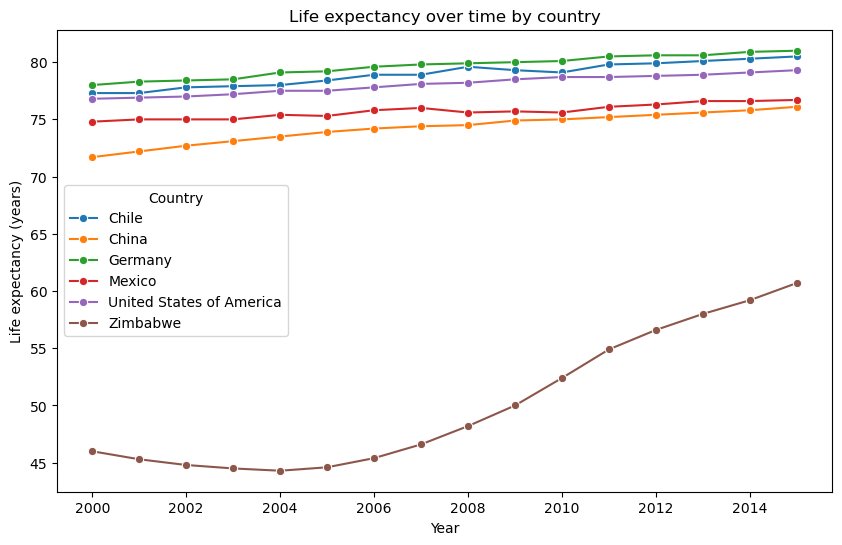

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=data,
    x="Year",
    y="LEABY",
    hue="Country",
    marker="o"
)
plt.title("Life expectancy over time by country")
plt.ylabel("Life expectancy (years)")
plt.show()

The graph plotted above show an upward trend of most of countries in the dataset. However, the most significant growth is seen by the change in life expectancy in Zimbabwer after year of 2004. 

Has GDP increased over time?

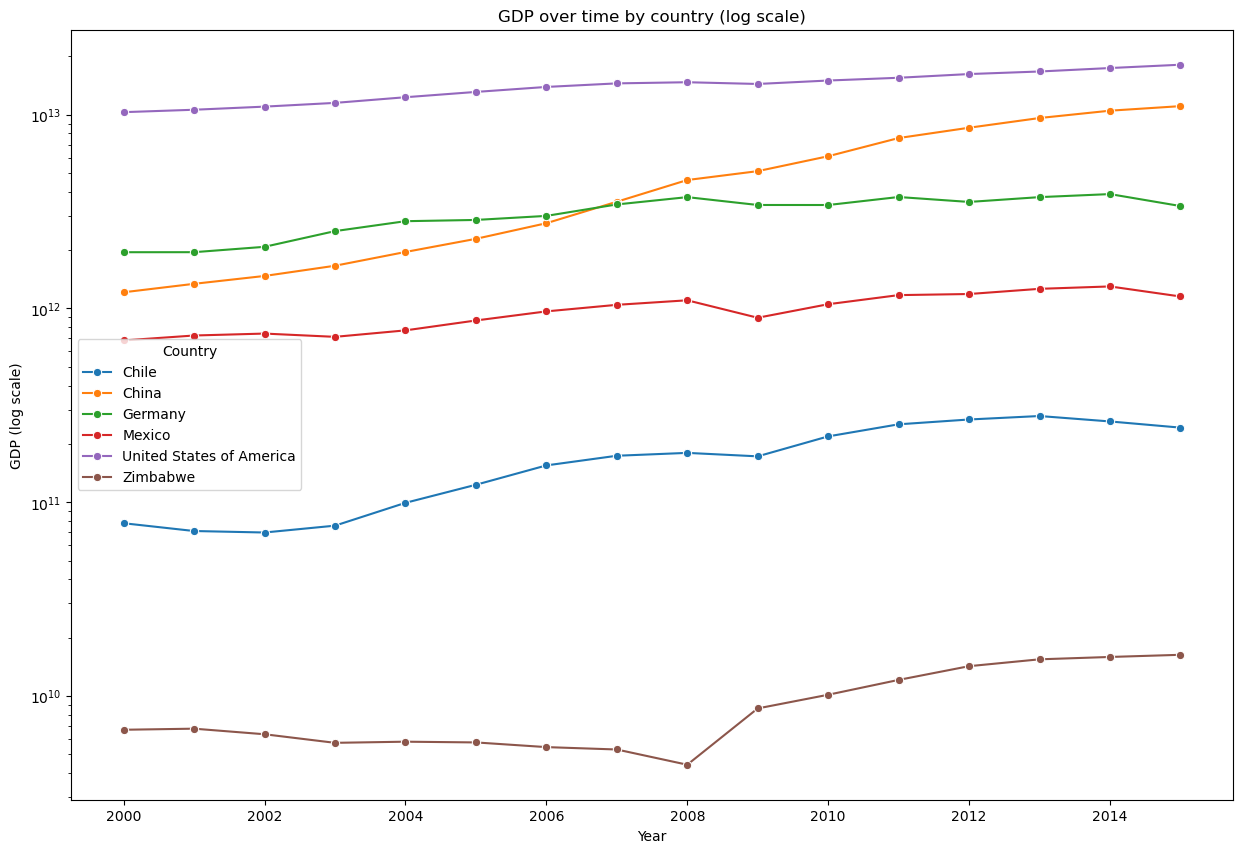

In [7]:
plt.figure(figsize=(15, 10))
sns.lineplot(
    data=data,
    x="Year",
    y="GDP",
    hue="Country",
    marker="o"
)
plt.yscale("log")
plt.title("GDP over time by country (log scale)")
plt.ylabel("GDP (log scale)")
plt.show()


As GDP values being shown raw with original amount of figures are too much, the log scale was used to convert the GDP values. 

China is seen as the one with strongest growth over time, while other countries' are either modest or variating up and down.

Is there a correlation between GDP and life expectancy?

<Figure size 640x480 with 0 Axes>

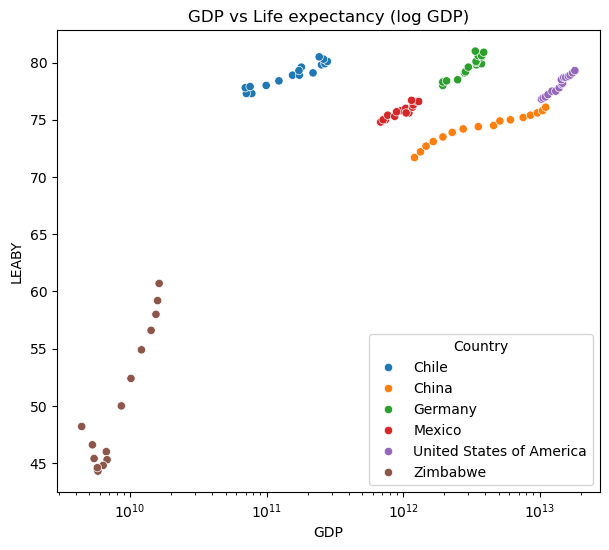

<Figure size 640x480 with 0 Axes>

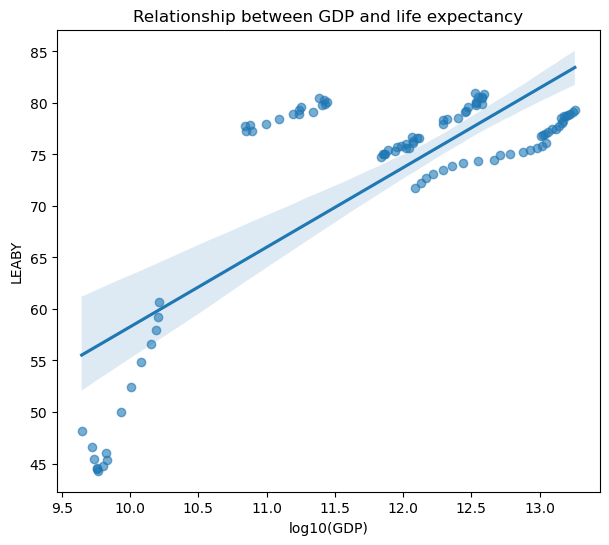

,LEABY,log_GDP
LEABY,1.000000,0.787342
log_GDP,0.787342,1.000000


In [16]:
# Overall correlation
plt.figure(figsize=(7, 6))
sns.scatterplot(data=data, x="GDP", y="LEABY", hue="Country")
plt.xscale("log")
plt.title("GDP vs Life expectancy (log GDP)")
plt.show()
plt.clf()

# Trend-line-integrated correlation
plt.figure(figsize=(7, 6))
sns.regplot(
    data=data,
    x= data["GDP"].apply(lambda x: np.log10(x)), 
    y="LEABY",
    scatter_kws={"alpha": 0.6}
)
plt.xlabel("log10(GDP)")
plt.title("Relationship between GDP and life expectancy")
plt.show()
plt.clf()

# Numeric correlation
data["log_GDP"] = np.log10(data["GDP"])
data[["LEABY", "log_GDP"]].corr()

In general, higher GDP is seen with a strong association to higher life expectancy.

What is the average life expectancy?

<Figure size 640x480 with 0 Axes>

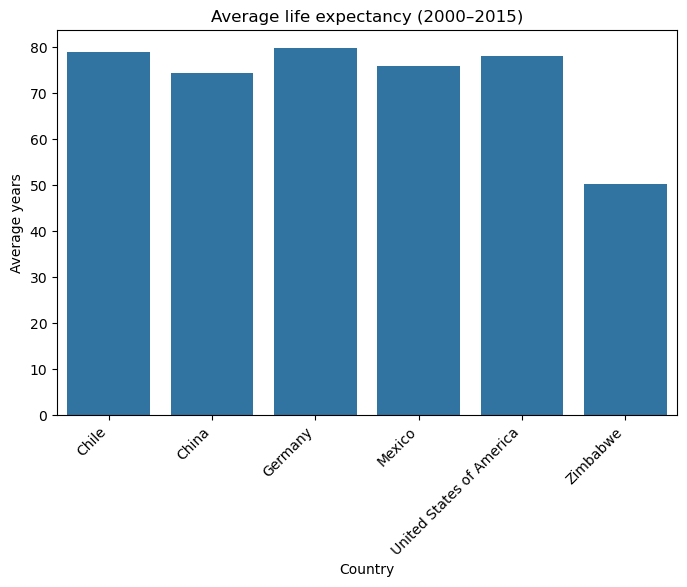

In [19]:
# Overall average
overall_avg = data["LEABY"].mean()
overall_avg

# Average per country
avg_by_country = data.groupby("Country")["LEABY"].mean().reset_index()
avg_by_country

# Bar chart visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_by_country, x="Country", y="LEABY")
plt.xticks(rotation=45, ha="right")
plt.title("Average life expectancy (2000–2015)")
plt.ylabel("Average years")
plt.show()


What is the distribution of life expectancy?

<Figure size 1000x600 with 0 Axes>

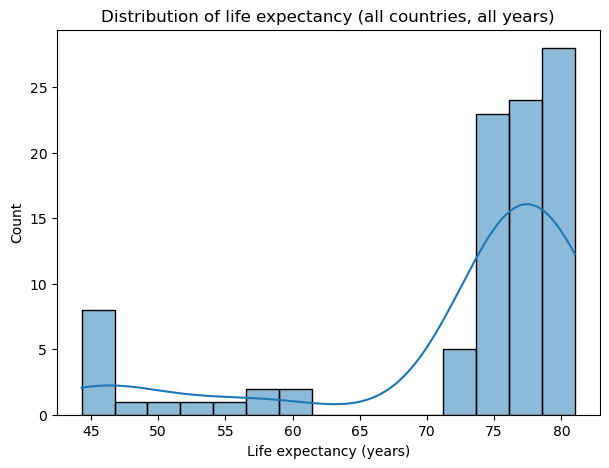

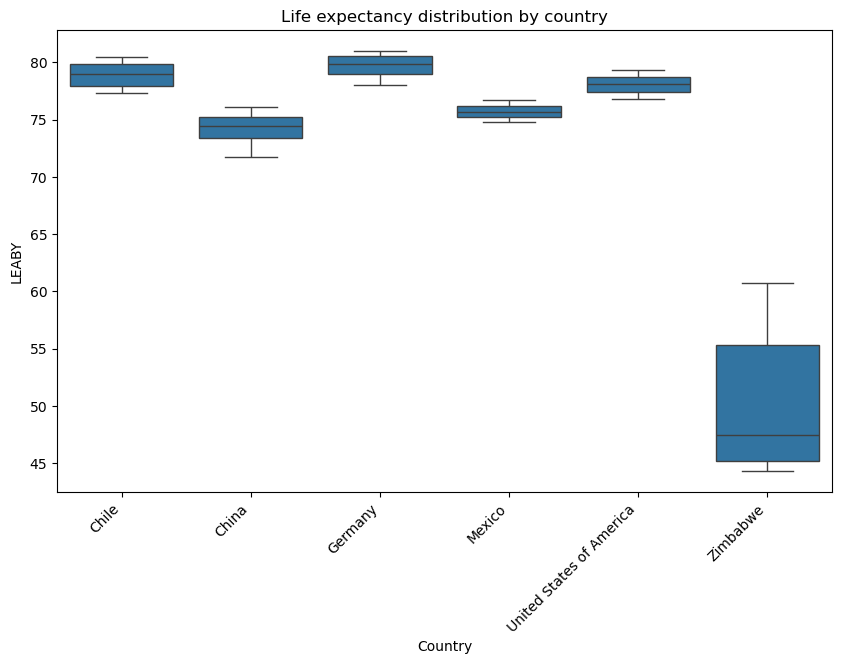

In [22]:
plt.figure(figsize=(7, 5))
sns.histplot(data["LEABY"], kde=True, bins=15)
plt.title("Distribution of life expectancy (all countries, all years)")
plt.xlabel("Life expectancy (years)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Country", y="LEABY")
plt.xticks(rotation=45, ha="right")
plt.title("Life expectancy distribution by country")
plt.show()

